Once we understand Set, Hash Map is easy to understand. The only difference is that Hash Map stores key-value pairs instead of single values.

In [2]:
class MySet:
    def __init__(self):
        table_size = 100
        self.table = [None] * table_size

    def add(self, value):
        index = value % len(self.table)

        if self.table[index] is None:
            self.table[index] = []
            
        for item in self.table[index]:
            if item == value:
                return False
        self.table[index].append(value)
        return True
    
    def contains(self, value):
        index = value % len(self.table)
        if self.table[index] is None:
            return False
        for item in self.table[index]:
            if item == value:
                return True
        return False

    def print_table(self):
        print(self.table)


s = MySet()

print(s.add(1))
print(s.add(2))
print(s.add(3))
print(s.add(1))

print()
s.print_table()
print()

print(s.contains(1))
print(s.contains(200))


True
True
True
False

[None, [1], [2], [3], None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]

True
False


In [3]:
class MyHashMap():
    def __init__(self):
        table_size = 100
        self.table = [None] * table_size

    # just add value parameter
    def put(self, key, value):
        index = key % len(self.table)

        if self.table[index] is None:
            self.table[index] = []

        for item in self.table[index]:
            if item[0] == key:
                return False

        # Differs here
        self.table[index].append((key, value))
        return True

    def get(self, key):
        index = key % len(self.table)
        if self.table[index] is None:
            return None
        for item in self.table[index]:
            if item[0] == key:
                # return the value
                return item[1]
        return None

    def print_table(self):
        print(self.table)

m = MyHashMap()

# put
print(m.put(1, "Alice"))
print(m.put(2, "Bob"))
print(m.put(3, "Charlie"))
print(m.put(1, "Alice"))

print()
m.print_table()
print()

# get
print(m.get(1))
print(m.get(5))

True
True
True
False

[None, [(1, 'Alice')], [(2, 'Bob')], [(3, 'Charlie')], None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]

Alice
None


## High Level Library

Python provides a high level library for Hash Map: `dict`.

In [4]:
d = dict()

# Put
d[1] = "Alice"
d[2] = "Bob"
d[3] = "Charlie"

# Get
print(d.get(1))
print(d.get(5))

print()

# or just use the [] operator
print(d[1])
# print(d[5]) # KeyError



Alice
None

Alice


## Complexity

The complexity of Hash Map is the same as Set: $O(1)$ for all operations.

| Operation | Complexity |
| --------- | ---------- |
| `get`     | $O(1)$     |
| `put`     | $O(1)$     |
| `remove`  | $O(1)$     |

## Use Case

### Simple Database

If we have a collection of (user_id, email)s, how can we quickly find the email of a given user_id?





In [21]:
users = [
    (1, "Alice"),
    (2, "Bob"),
    (3, "Charlie"),
    (4, "David"),
    (5, "Eve"),
    (6, "Fred"),
    (7, "George")
]

One way is to use a list of tuples:

In [22]:
database = []
for user in users:
    database.append(user)
print(database)

[(1, 'Alice'), (2, 'Bob'), (3, 'Charlie'), (4, 'David'), (5, 'Eve'), (6, 'Fred'), (7, 'George')]


In [24]:
def get_name(db, user_id):
    # O(n)
    for user in db:
        if user[0] == user_id:
            return user[1]
    return None

print(get_name(database, 3))

Charlie


But this is not efficient. If we have 1,000,000 users, we need to scan the **whole** list to find the name of a given user_id.

Let's use a Hash Map instead:

In [25]:
database = {}
for user in users:
    database[user[0]] = user[1]

print(database)

{1: 'Alice', 2: 'Bob', 3: 'Charlie', 4: 'David', 5: 'Eve', 6: 'Fred', 7: 'George'}


In [26]:
def get_name(db, user_id):
    # O(1)
    return db.get(user_id)

print(get_name(database, 3))

Charlie


This now becomes `O(1)`!

In fact, this is the foundation of database index:

```sql
CREATE TABLE hash_table_example (
    id INT,
    name VARCHAR(100),
    INDEX USING HASH (id)
) ENGINE=MEMORY;
```

Although the more common index is B-Tree, which offer more features (e.g. range query: `SELECT name where id > 3 and id < 5`).

### Cache

In web applications, we often need to cache some data in memory to speed up the response time. For example, we can cache the result of a database query:

What is cache?


In [32]:
import time
def square(x):
    # simulating slow function, in real life this might be network request or database query
    time.sleep(1)
    return x * x

In [33]:
# print square of 1 to 5, track the time to execute

start_time = time.time()
for i in range(1, 6):
    print(square(i))
end_time = time.time()
print("Time elapsed: ", end_time - start_time)

# do it again
start_time = time.time()
for i in range(1, 6):
    print(square(i))
end_time = time.time()
print("Time elapsed: ", end_time - start_time)


1
4
9
16
25
Time elapsed:  5.021115064620972
1
4
9
16
25
Time elapsed:  5.013765811920166


Although we have calculated the result before, we still need to recalculate it every time. This is not efficient.

Now, let's cache the result:

In [35]:
import time

cache = {}
def square(x):
    # check cache
    if x in cache:
        return cache[x]

    time.sleep(1)
    result = x * x
    # store it in cache before returning
    cache[x] = result
    return result

In [36]:
# print square of 1 to 5, track the time to execute

start_time = time.time()
for i in range(1, 6):
    print(square(i))
end_time = time.time()
print("Time elapsed: ", end_time - start_time)

# do it again
start_time = time.time()
for i in range(1, 6):
    print(square(i))
end_time = time.time()
print("Time elapsed: ", end_time - start_time)


1
4
9
16
25
Time elapsed:  5.011118173599243
1
4
9
16
25
Time elapsed:  0.00012993812561035156


The second time it is called, we can get the result directly from the cache, without calculating it again.

See how much time we saved!

### Graph

We can represent a graph using a Hash Map. We will discuss more about Graph later, but let's assume we want to model a social network connection

In [37]:
following = {}

following["Alice"] = ["Bob", "Charlie"]
following["Bob"] = ["Alice", "Charlie", "David"]
following["Charlie"] = ["Alice", "Bob", "David"]

print(following)


{'Alice': ['Bob', 'Charlie'], 'Bob': ['Alice', 'Charlie', 'David'], 'Charlie': ['Alice', 'Bob', 'David']}


In [ ]:
%pip install networkx

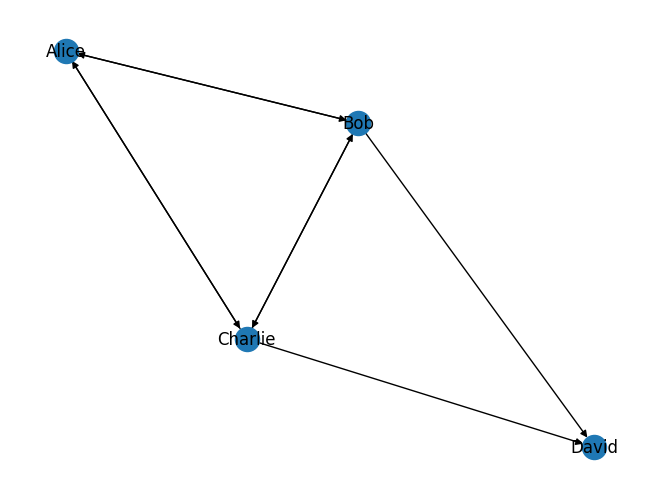

In [44]:
#| echo: false
following = {'Alice': ['Bob', 'Charlie'], 'Bob': ['Alice', 'Charlie', 'David'], 'Charlie': ['Alice', 'Bob', 'David']}

# draw the graph using library

import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph(following) # modified line

nx.draw(G, with_labels=True)
plt.show()

